
<h1>EDA</h1>

In [218]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from wordcloud import WordCloud, STOPWORDS

In [2]:
#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [81]:
#reading dataset in a dataframe
df = pd.read_csv("all_tickets.csv")
#inspecting the data set
df.head(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [82]:
# Columns contain in dataset
print(df.columns)
# Rows and columns
print(df.shape)

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')
(48549, 9)


In [5]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [121]:
#checking the statistical information of the dataset
df.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000
mean,0.713115,4.491153,11.614390,32.004634,49.482605,2.506066,3.677460
std,0.452312,1.103556,13.752707,33.602122,22.806100,0.855646,0.591513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,49.000000,3.000000,4.000000
75%,1.000000,5.000000,21.000000,53.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,114.000000,102.000000,3.000000,4.000000


In [117]:
# Find missing value
print('Missing value counts :\n',df.isnull().sum())

Missing value counts :
 title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64


In [112]:
duplicate=df.duplicated()
print('Total count of duplicated values :',duplicate.sum())

Total count of duplicated values : 0


Ticket type counts
1    34621
0    13928
Name: ticket_type, dtype: int64


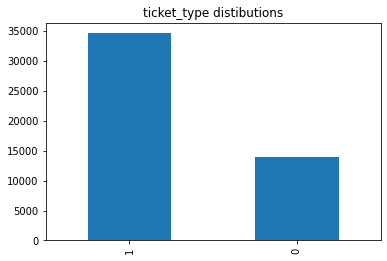

In [101]:
count_ticket=df["ticket_type"].value_counts()
print('Ticket type counts')
print(count_ticket)
count_ticket.plot(kind='bar')
plt.title('ticket_type distibutions')
plt.show()

**OBSERVATIONS**\
The given dataset is imbalanced.
Its in ratio 3:1.

Category counts
4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64


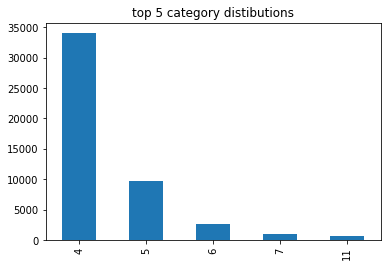

In [104]:
count_category=df["category"].value_counts()
print('Category counts')
print(count_category)
count_category[:5].plot(kind='bar')
plt.title('top 5 category distibutions')
plt.show()

**OBSERVATIONS** \
Out of the ticket generated, most of them belongs to category 4.

Top 10 : Sub_Category-1 counts
2     9857
3     8324
1     7857
13    6487
21    5710
51    2402
22    1475
15    1226
9     1114
12     624
Name: sub_category1, dtype: int64


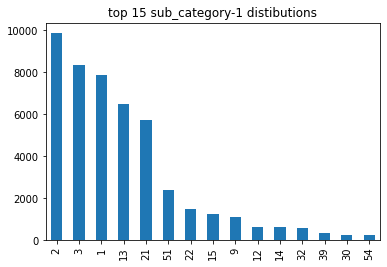

In [106]:
count_category1=df["sub_category1"].value_counts()
print('Top 10 : Sub_Category-1 counts')
print(count_category1[:10])
count_category1[:15].plot(kind='bar')
plt.title('top 15 sub_category-1 distibutions')
plt.show()

Top 10 : Sub_Category-2 counts
7      18197
21      6581
41      3232
0       2705
88      2243
23      1733
94      1626
1       1151
105     1145
87      1012
Name: sub_category2, dtype: int64


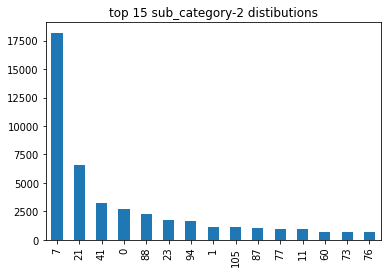

In [107]:
count_category2=df["sub_category2"].value_counts()
print('Top 10 : Sub_Category-2 counts')
print(count_category2[:10])
count_category2[:15].plot(kind='bar')
plt.title('top 15 sub_category-2 distibutions')
plt.show()

Urgency counts
3    34621
1     6748
2     5528
0     1652
Name: urgency, dtype: int64


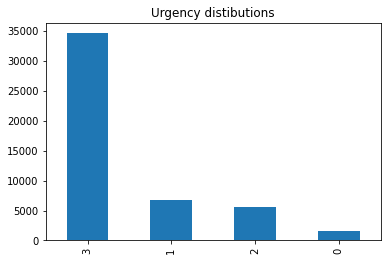

In [103]:
count_urgency=df["urgency"].value_counts()
print('Urgency counts')
print(count_urgency)
count_urgency.plot(kind='bar')
plt.title('Urgency distibutions')
plt.show()

**OBSERVATIONS**\
Majority of the tickets have the highest level of urgency-3.

Impact counts
4    34621
3    13184
0      471
2      228
1       45
Name: impact, dtype: int64


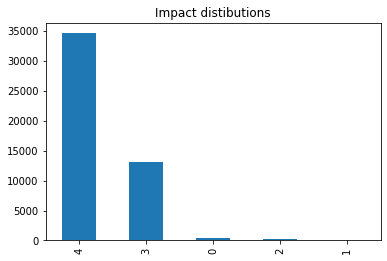

In [102]:
count_impact=df["impact"].value_counts()
print('Impact counts')
print(count_impact)
count_impact.plot(kind='bar')
plt.title('Impact distibutions')
plt.show()

**OBSERVATIONS**\
Majority of the tickets have the highest level of impact-4.

Top 10 business_service
32    8174
36    3685
68    3589
67    2858
4     2527
40    2199
63    1997
46    1984
56    1910
73    1882
Name: business_service, dtype: int64


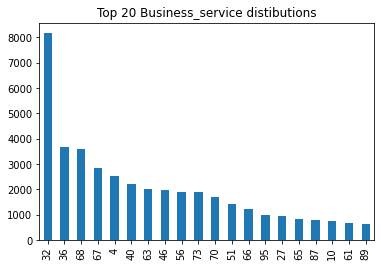

In [100]:
count_business_service=df["business_service"].value_counts()
print('Top 10 business_service')
print(count_business_service[:10])
count_business_service[:20].plot(kind='bar')
plt.title('Top 20 Business_service distibutions')
plt.show()

**OBSERVATIONS**\
48549 rows and 9 columns.\
712(1.46%) data were missing in title column.\
7 columns is of int datatype and only 2 columns were object.

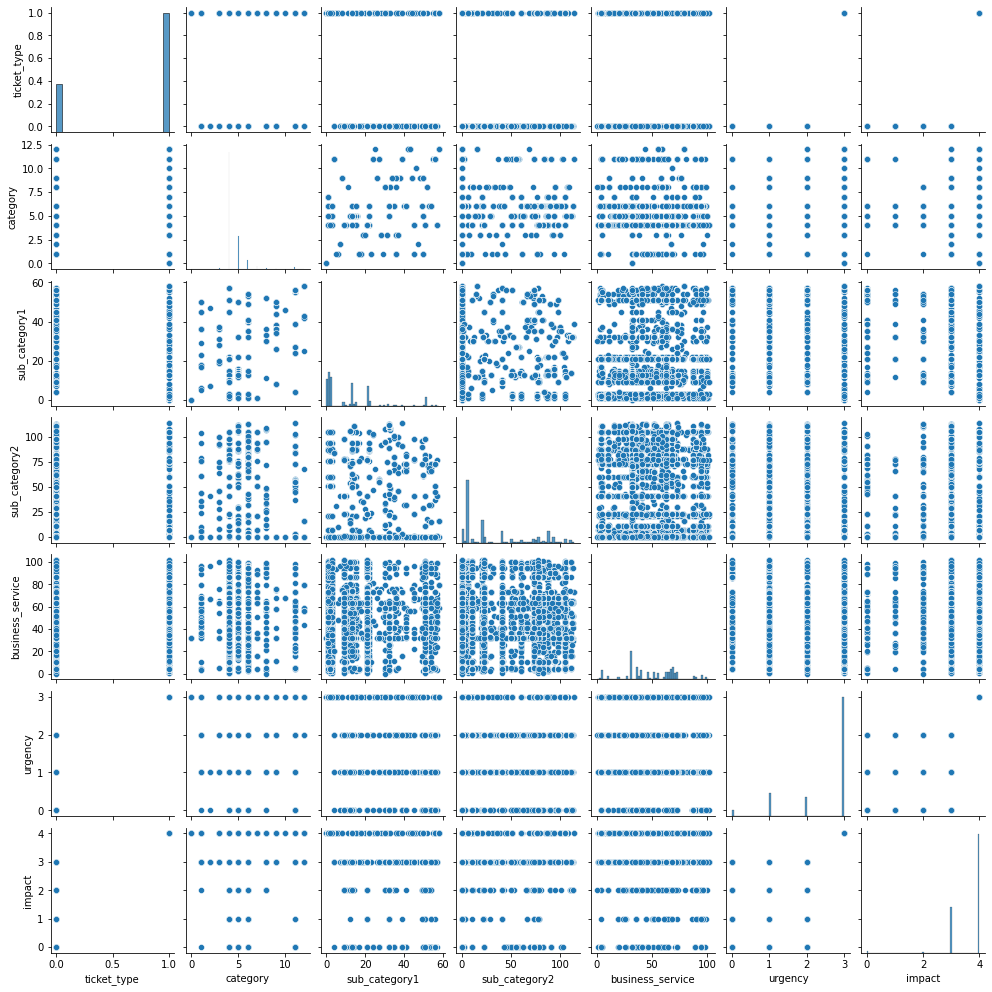

In [15]:
sns.pairplot(data=df, vars=['ticket_type', 'category', 'sub_category1','sub_category2', 'business_service', 'urgency', 'impact'], size=2)
plt.show()

Pair Plot b/w ticket_type , urgency & impact


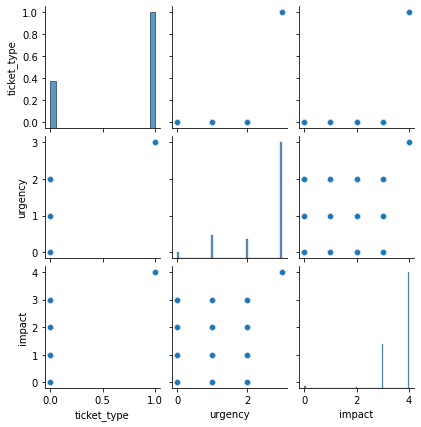

In [110]:
print('Pair Plot b/w ticket_type , urgency & impact')
sns.pairplot(data=df, vars=['ticket_type','urgency', 'impact'], size=2)
plt.show()

**OBSERVATIONS** \
All of the ticket-type 1 belongs to urgency level -3.\
All of the ticket-type 1 belongs to impact level -4.


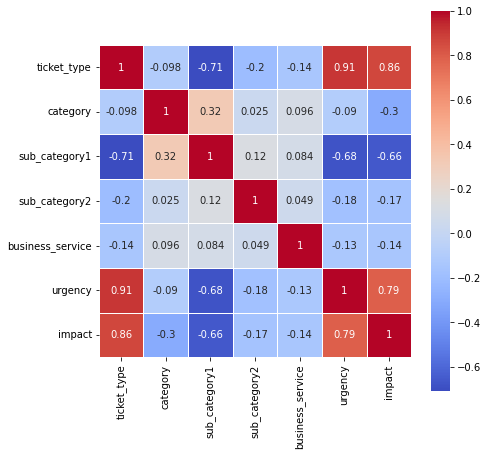

In [172]:
# correlation matrix using the heatmap
corr_mat=df.corr()
plt.figure(figsize = corr_mat.shape)
sns.heatmap(data=corr_mat,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

**OBSERVATIONS** \
From the correlation matrix, we can deduce that ticket_type, urgency and impact have very high correlations.

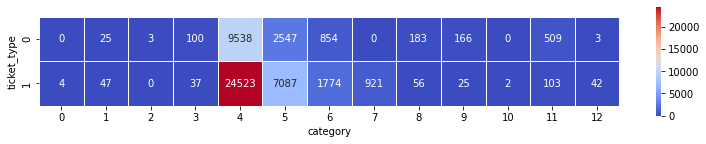

In [188]:
plt.figure(figsize = (len(count_category),len(count_ticket)))
ticket_category=pd.crosstab(df['ticket_type'],df['category'])
sns.heatmap(data=ticket_category,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

**OBSERVATIONS** \
Here category 4 and 5 requires majority of the human intervention to resolve the situation. So company must find the main reason behind large no.s of queries for category 4&5 as they consume lots of manpower.

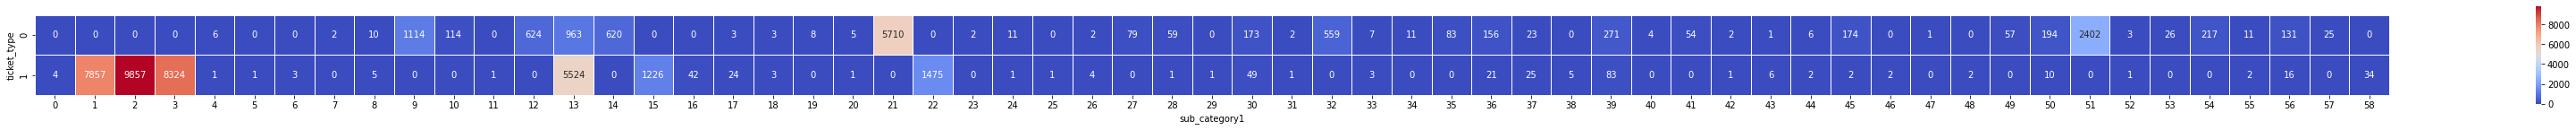

In [330]:
plt.figure(figsize = (len(count_category1),len(count_ticket)))
ticket_category1=pd.crosstab(df['ticket_type'],df['sub_category1'])
sns.heatmap(data=ticket_category1,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

**OBSERVATIONS** \
Further classifying the categories, Ticket having class-1,2,3 of sub_category1 required more human intervention than the rest.
So this should be the prime focus area of the company.

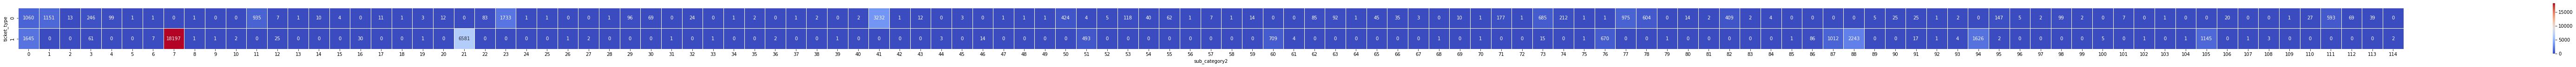

In [186]:
plt.figure(figsize = (len(count_category2),len(count_ticket)))
ticket_category2=pd.crosstab(df['ticket_type'],df['sub_category2'])
sns.heatmap(data=ticket_category2,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

**Observation**\
Ticket having class-7 of sub_category2 has raised more than 40% of the tickets and all of that are type 1, which require human intervention.
\
So resolving this will free up the 40% of human resources of the company.

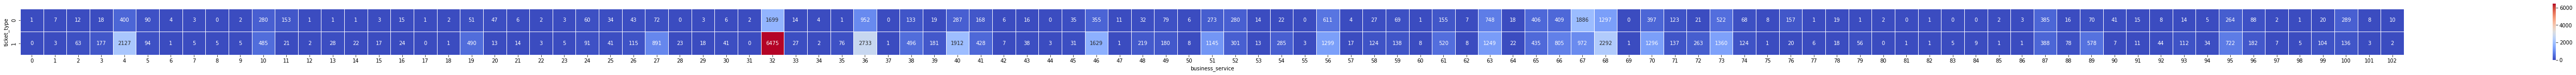

In [185]:
plt.figure(figsize = (len(count_business_service),len(count_ticket)))
ticket_business=pd.crosstab(df['ticket_type'],df['business_service'])
sns.heatmap(data=ticket_business,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

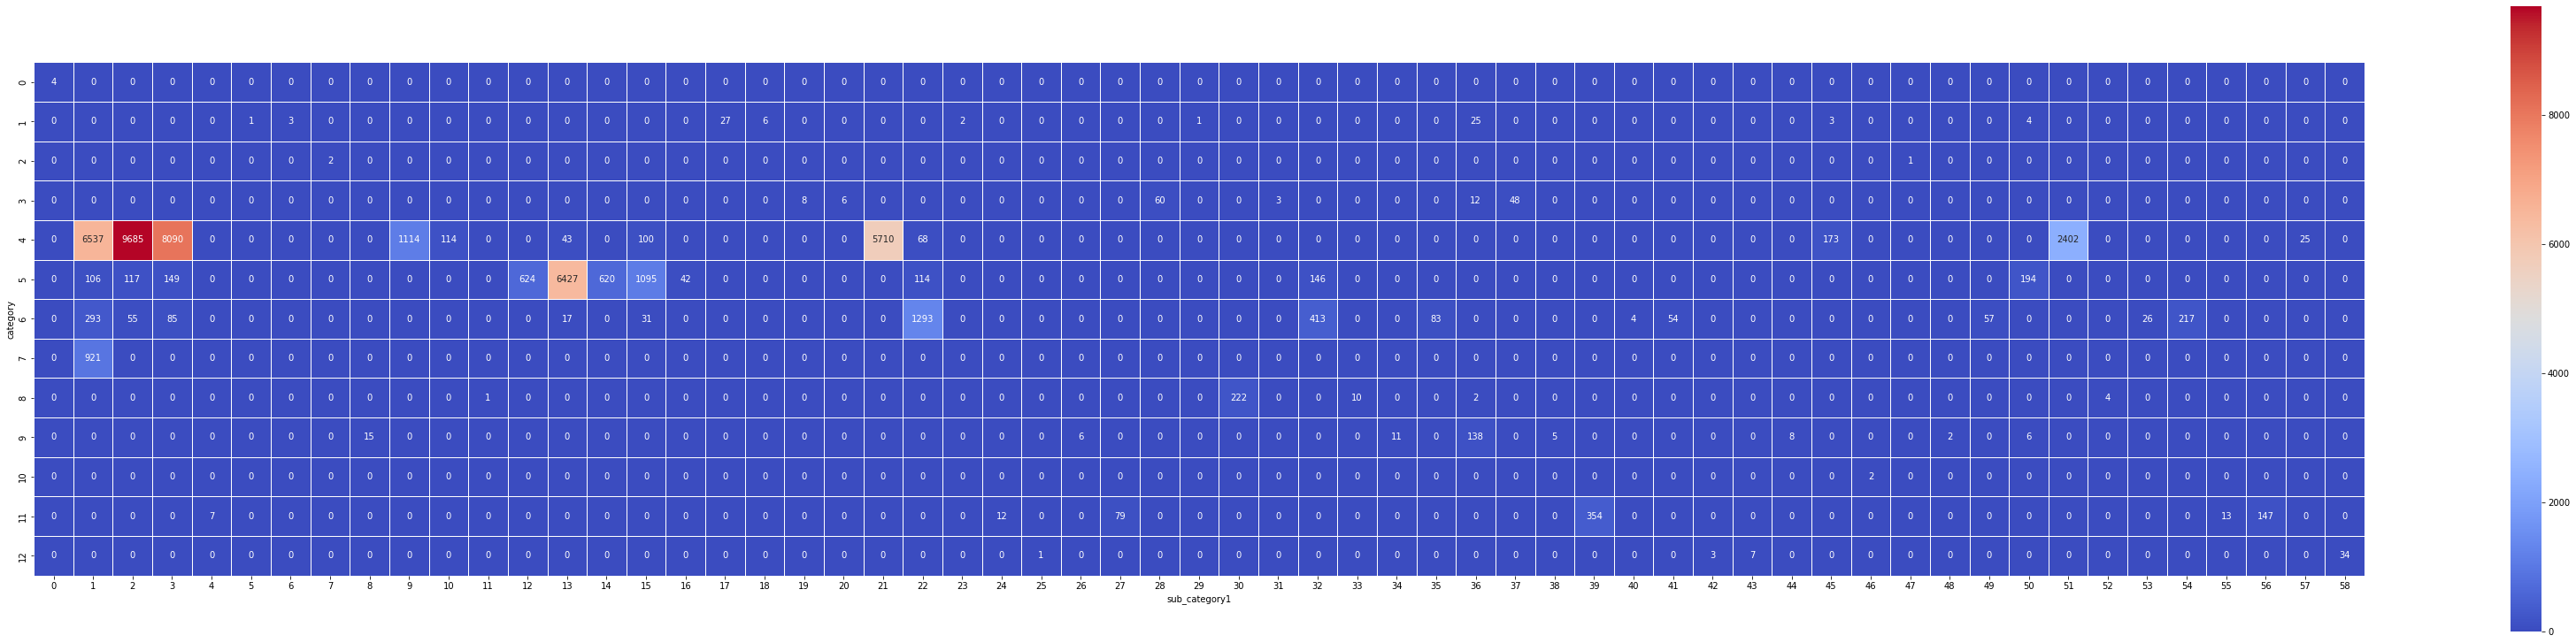

In [184]:
plt.figure(figsize = (len(count_category1),len(count_category)))
category_category1=pd.crosstab(df['category'],df['sub_category1'])
sns.heatmap(data=category_category1,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

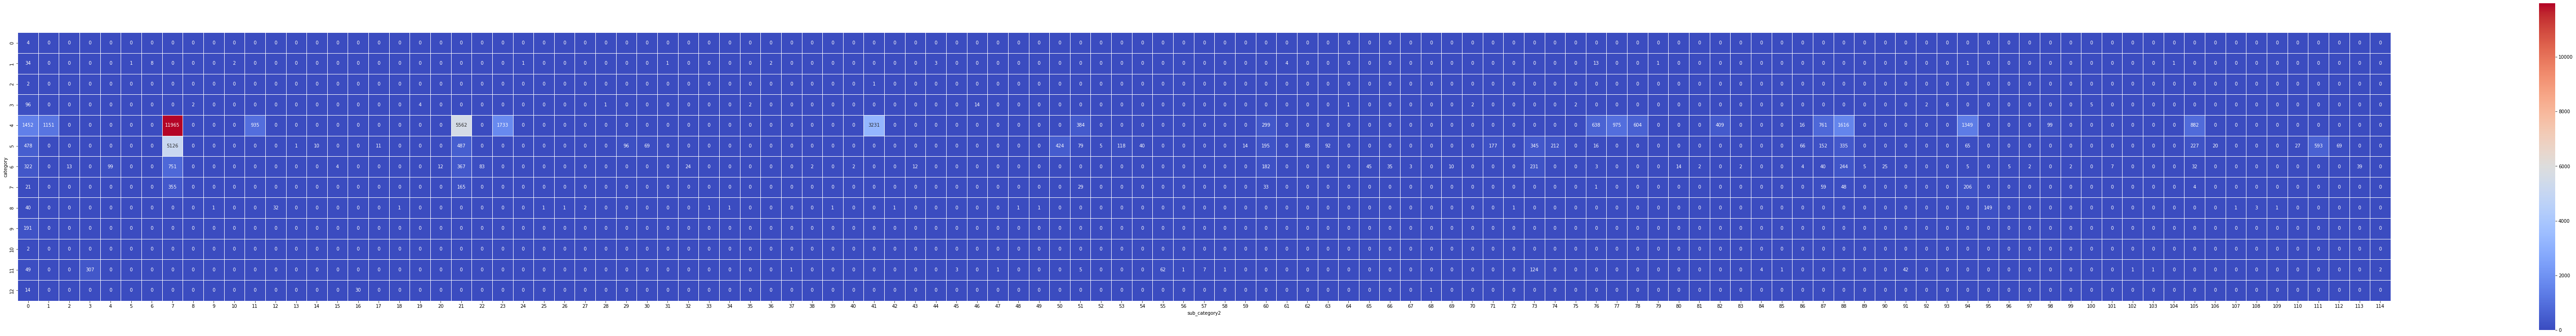

In [183]:
plt.figure(figsize = (len(count_category2),len(count_category)))
category_category2=pd.crosstab(df['category'],df['sub_category2'])
sns.heatmap(data=category_category2,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

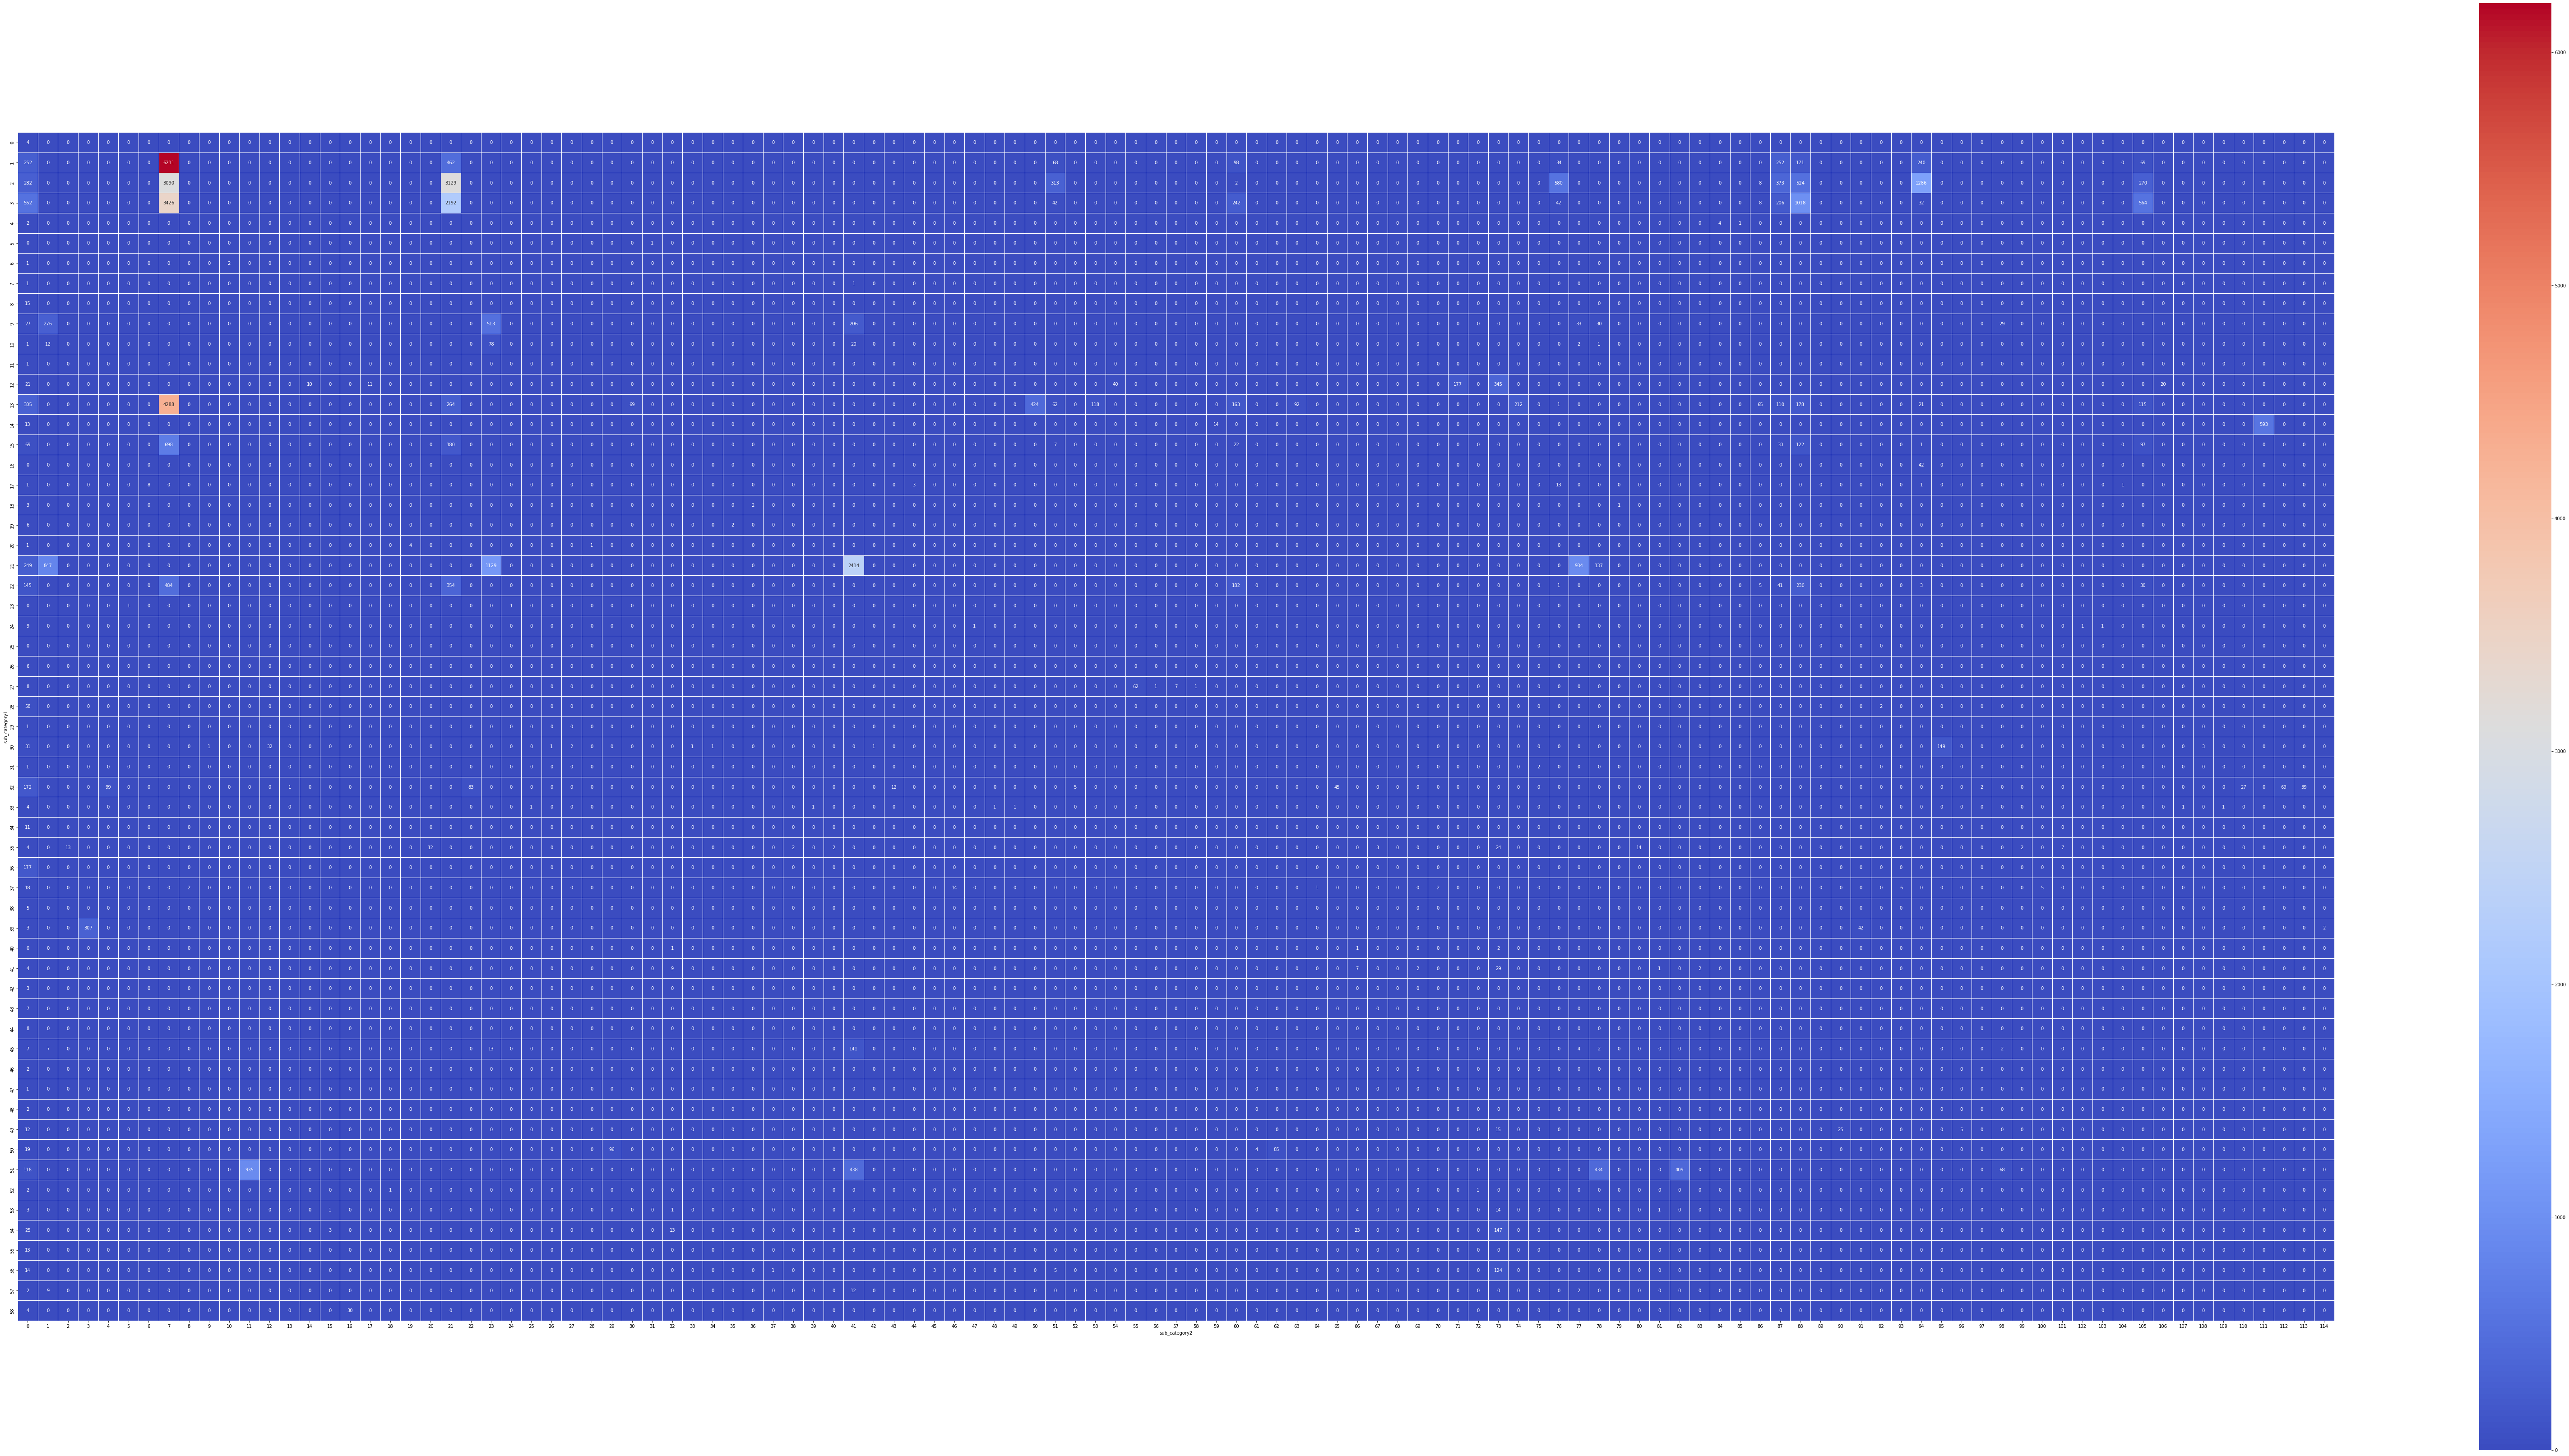

In [182]:
plt.figure(figsize = (len(count_category2),len(count_category1)))
category1_category2=pd.crosstab(df['sub_category1'],df['sub_category2'])
sns.heatmap(data=category1_category2,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

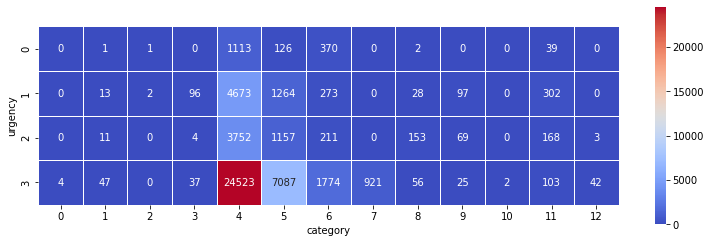

In [181]:
plt.figure(figsize = (len(count_category),len(count_urgency)))
urgency_category=pd.crosstab(df['urgency'],df['category'])
sns.heatmap(data=urgency_category,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

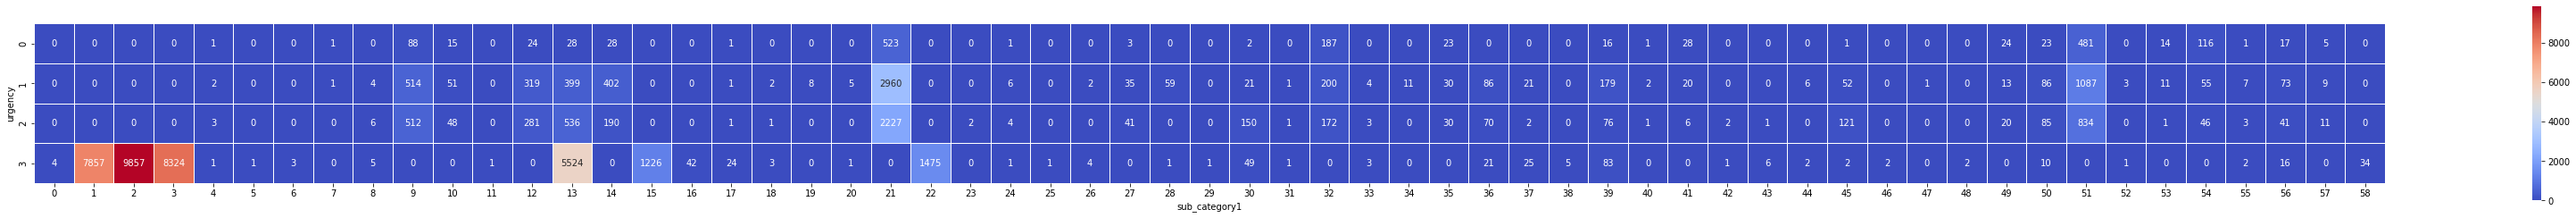

In [189]:
plt.figure(figsize = (len(count_category1),len(count_urgency)))
urgency_category1=pd.crosstab(df['urgency'],df['sub_category1'])
sns.heatmap(data=urgency_category1,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

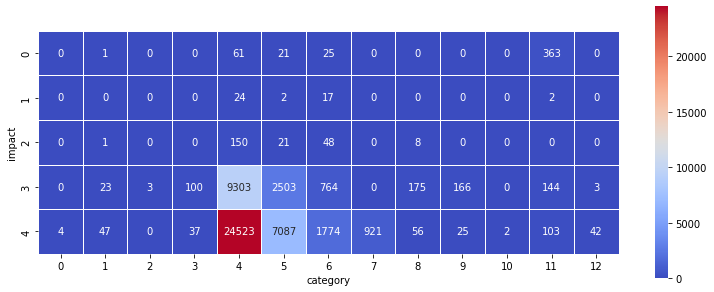

In [190]:
plt.figure(figsize = (len(count_category),len(count_impact)))
impact_category=pd.crosstab(df['impact'],df['category'])
sns.heatmap(data=impact_category,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

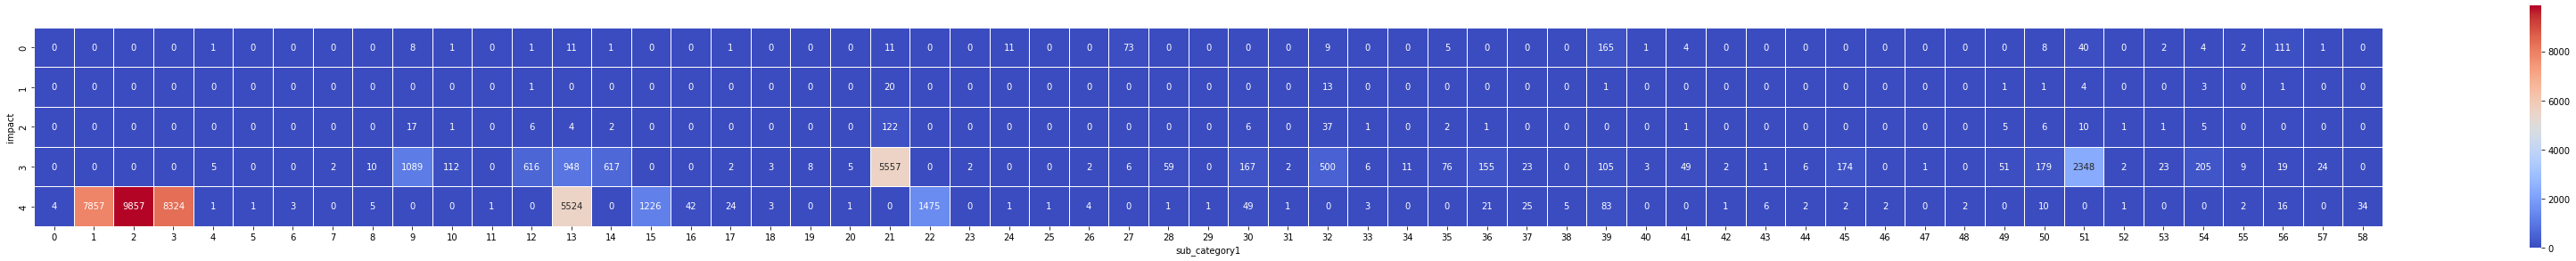

In [191]:
plt.figure(figsize = (len(count_category1),len(count_impact)))
impact_category1=pd.crosstab(df['impact'],df['sub_category1'])
sns.heatmap(data=impact_category1,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

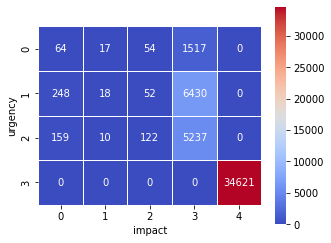

In [192]:
plt.figure(figsize = (len(count_impact),len(count_urgency)))
urgency_impact=pd.crosstab(df['urgency'],df['impact'])
sns.heatmap(data=urgency_impact,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True,fmt='.0f')
plt.show()

Seems like urgency and impact is distributed same for the tickets type-1.\
All tickets of urgency level-3, have business impact of level-4.\
If a ticket has urgency of level-3, then it must required human interventions.\
If a ticket has impact of level-4, then it must required human interventions.

In [197]:
# replacing null values
df_copy = df.copy()
df_copy.fillna('', inplace=True)
df_copy.head(2)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4


In [198]:
# joining title and body into info column
df_copy['info'] = df_copy['title'] + ' ' + df_copy['body']
df_copy.head(2)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,hi since recruiter lead permission approve re...
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,connection with icon icon dear please setup ic...


In [206]:
# Adding some basic columns (feature engineering)
info_char_count_0 = df_copy[df_copy['ticket_type']==0]['info'].apply(lambda x: len(x))
info_char_count_1 = df_copy[df_copy['ticket_type']==1]['info'].apply(lambda x: len(x))
info_word_count_0 = df_copy[df_copy['ticket_type']==0]['info'].apply(lambda x: len(x.split()))
info_word_count_1 = df_copy[df_copy['ticket_type']==1]['info'].apply(lambda x: len(x.split()))

In [215]:
print('Statistics for characters in ticket 0 :\n',info_char_count_0.describe())
print('\n\nStatistics for characters in ticket 1 :\n',info_char_count_1.describe())

Statistics for characters in ticket 0 :
 count    13928.000000
mean       360.162909
std        433.549130
min          6.000000
25%        150.000000
50%        226.500000
75%        377.000000
max       6880.000000
Name: info, dtype: float64


Statistics for characters in ticket 1 :
 count    34621.000000
mean       262.641923
std        363.168658
min          7.000000
25%         99.000000
50%        153.000000
75%        266.000000
max       7015.000000
Name: info, dtype: float64


In [214]:
print('Statistics for words in ticket 0 :\n',info_word_count_0.describe())
print('\n\nStatistics for words in ticket 1 :\n',info_char_count_0.describe())

Statistics for words in ticket 0 :
 count    13928.000000
mean        56.131246
std         66.187610
min          2.000000
25%         24.000000
50%         36.000000
75%         59.000000
max        981.000000
Name: info, dtype: float64


Statistics for words in ticket 1 :
 count    13928.000000
mean       360.162909
std        433.549130
min          6.000000
25%        150.000000
50%        226.500000
75%        377.000000
max       6880.000000
Name: info, dtype: float64


In [216]:
text = ' '.join(df_copy['info'])

In [319]:
def word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [320]:
freq_word=word_count(text)
sorted_freq_word=list(sorted(freq_word.items(),key= lambda x:x[1]))

In [321]:
sorted_freq_word.reverse()
print('Top 10 occurrence words')
sorted_freq_word[:10]

Top 10 occurrence words


[('please', 70918),
 ('pm', 29353),
 ('hi', 28906),
 ('regards', 27525),
 ('thank', 25261),
 ('for', 24558),
 ('hello', 23275),
 ('you', 21994),
 ('re', 21300),
 ('thanks', 20142)]

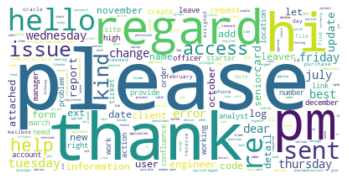

In [310]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False,stopwords = set(STOPWORDS), background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [323]:
text_0 = ' '.join(df_copy[df_copy['ticket_type']==0]['info'])
freq_word_0=word_count(text_0)
sorted_freq_word_0=list(sorted(freq_word_0.items(),key= lambda x:x[1]))

In [324]:
sorted_freq_word_0.reverse()
print('Top 10 occurrence words for ticket 0')
sorted_freq_word_0[:10]

Top 10 occurrence words for ticket 0


[('you', 21950),
 ('for', 18649),
 ('please', 17659),
 ('sent', 14761),
 ('with', 10210),
 ('can', 9517),
 ('have', 9459),
 ('hi', 7994),
 ('error', 7217),
 ('regards', 7184)]

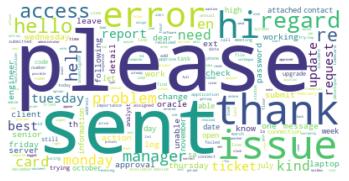

In [325]:
# Creating word_cloud with text as argument in .generate() method
word_cloud_0 = WordCloud(collocations = False,stopwords = set(STOPWORDS), background_color = 'white').generate(text_0)
# Display the generated Word Cloud
plt.imshow(word_cloud_0, interpolation='bilinear')
plt.axis("off")
plt.show()

In [326]:
text_1 = ' '.join(df_copy[df_copy['ticket_type']==1]['info'])
freq_word_1=word_count(text_1)
sorted_freq_word_1=list(sorted(freq_word_1.items(),key= lambda x:x[1]))

In [327]:
sorted_freq_word_1.reverse()
print('Top 10 occurrence words for ticket 1')
sorted_freq_word_1[:10]

Top 10 occurrence words for ticket 1


[('please', 53259),
 ('pm', 29323),
 ('hi', 20912),
 ('regards', 20341),
 ('thank', 19177),
 ('hello', 16907),
 ('re', 16087),
 ('thanks', 14901),
 ('kind', 10261),
 ('tuesday', 8312)]

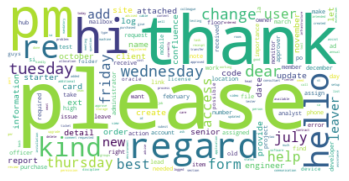

In [328]:
# Creating word_cloud with text as argument in .generate() method
word_cloud_1 = WordCloud(collocations = False,stopwords = set(STOPWORDS), background_color = 'white').generate(text_1)
# Display the generated Word Cloud
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()